## Modelling

### Import Libraries

In [3]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from time import time

### Read Data

In [4]:
df = pd.read_csv("./data/transformed_data.csv")
df

,Area,Price,ClubHouse,Park,Pool,Gym,akurdi,balewadi,dhanori,karvanagar,...,manjri,mohammadwadi,mundhwa,other,pisoli,susgaon,talegoan,tathawade,undri,vimannagar
0,-1.121851,-1.226432,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.374371,-0.218083,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.069548,0.038845,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.272384,0.403048,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.456541,0.038845,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2.875308,1.535257,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
189,1.815054,2.207192,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
190,0.683232,0.531134,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
191,1.966140,1.212415,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### GridSeachCV Report

In [5]:
# function for performing grid search
def gridSearchReport(estimator, X, y, params, cv=None):
    t0 = time()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train tets split
    
    gridSearchCV = GridSearchCV(
        estimator, 
        param_grid=params, 
        scoring="neg_mean_squared_error", 
        n_jobs=-1, 
        cv=cv
       )
    
    gridSearchCV.fit(X_train, y_train)
    
    print("Best parameters:", gridSearchCV.best_params_)
    print("Best CV score:", abs(gridSearchCV.best_score_))
    
    y_train_pred, y_test_pred = gridSearchCV.predict(X_train), gridSearchCV.predict(X_test)
    
    print("MSE, R2 train:", mean_squared_error(y_train, y_train_pred),  # evaluation metrics
          ", ", r2_score(y_train, y_train_pred) )
    
    print("MSE, R2 test:", mean_squared_error(y_test, y_test_pred),
          ", ", r2_score(y_test, y_test_pred) )
    
    t = round(time()-t0, 2)
    print("Elapsed time:", t, "s ,", round(t/60, 2), "min")
    
    return gridSearchCV    

### Train-Test Split

In [6]:
X = df.drop(columns=['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((154, 26), (39, 26), (154,), (39,))

### Linear Regression

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_predicted_train = lr_model.predict(X_train)
y_predicted_test = lr_model.predict(X_test)

<Axes: ylabel='Price'>

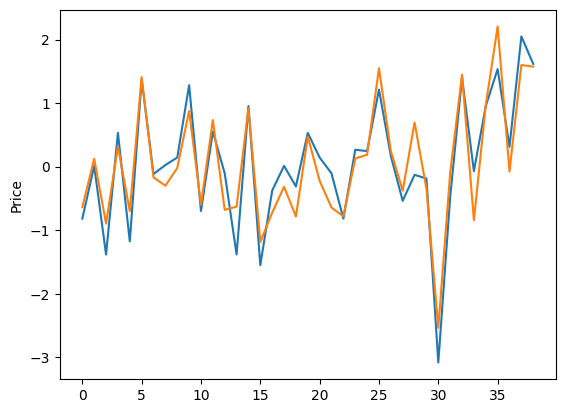

In [9]:
sns.lineplot(x=range(len(y_test[:])), y=y_test[:])
sns.lineplot(x=range(len(y_predicted_test[:])), y=y_predicted_test[:])

In [10]:
print("Metric on Training Data")
print("MSE:", mean_squared_error(y_train, y_predicted_train))
print("RMSE:", root_mean_squared_error(y_train, y_predicted_train))
print("R2:", r2_score(y_train, y_predicted_train))
print()
print("Metric on Testing Data")
print("MSE:", mean_squared_error(y_test, y_predicted_test))
print("RMSE:", root_mean_squared_error(y_test, y_predicted_test))
print("R2:", r2_score(y_test, y_predicted_test))

Metric on Training Data
MSE: 0.10250078888743602
RMSE: 0.3201574439044578
R2: 0.897546697124125

Metric on Testing Data
MSE: 0.14174884090082093
RMSE: 0.3764954726166318
R2: 0.8575267169147528


### Residual Plots

In [11]:
residuals_train = y_train - y_predicted_train
residuals_test = y_test - y_predicted_test

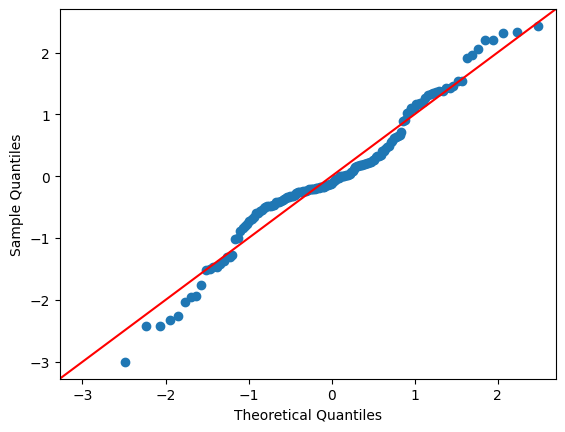

In [12]:
fig = sm.qqplot(
    residuals_train, 
    fit=True, 
    line='45'
)

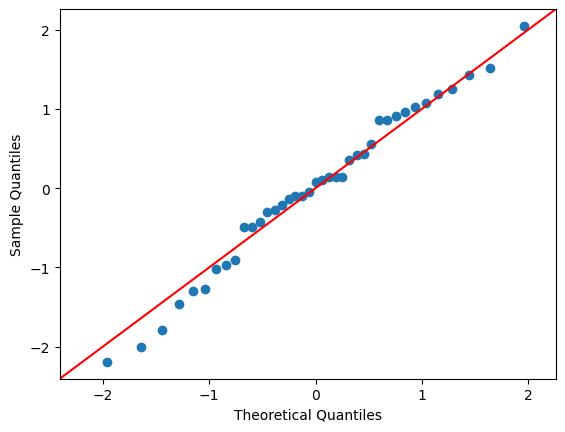

In [13]:
fig = sm.qqplot(
    residuals_test, 
    fit=True, 
    line='45'
)

<Axes: xlabel='Price'>

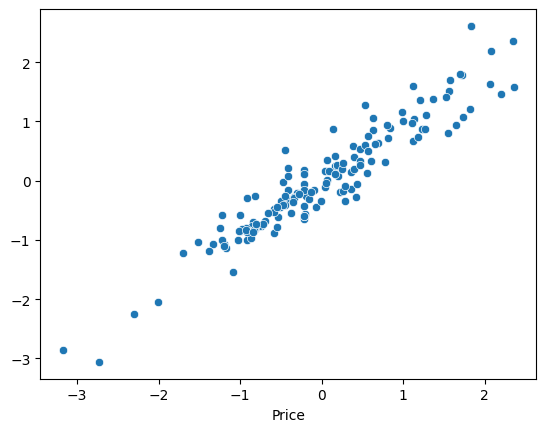

In [14]:
sns.scatterplot(x=y_train, y=y_predicted_train)

<Axes: xlabel='Price'>

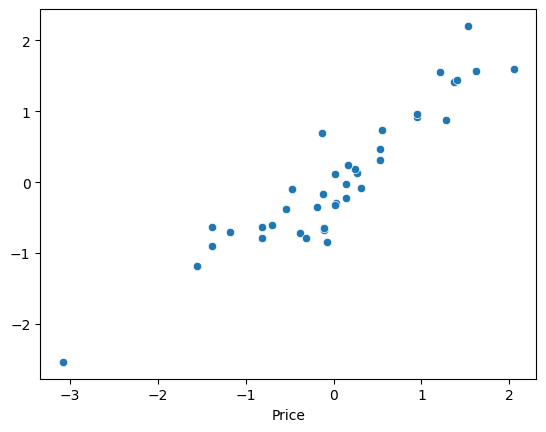

In [15]:
sns.scatterplot(x=y_test, y=y_predicted_test)

### Ridge Regression

In [16]:
ridge_model = gridSearchReport(Ridge(), X, y, params={"alpha": np.logspace(-3, 3, 100)})

Best parameters: {'alpha': np.float64(0.1747528400007685)}
Best CV score: 0.17594135932902316
MSE, R2 train: 0.1170229947960983 ,  0.8880014943563642
MSE, R2 test: 0.08294659454576629 ,  0.8982830966273276
Elapsed time: 1.48 s , 0.02 min


### Lasso Regression

In [17]:
lasso_model = gridSearchReport(Lasso(), X, y, params={"alpha": np.logspace(-3, 3, 100)})

Best parameters: {'alpha': np.float64(0.001)}
Best CV score: 0.1768955323888437
MSE, R2 train: 0.11334021295077915 ,  0.8795705173640573
MSE, R2 test: 0.15899107732625584 ,  0.8656072944644946
Elapsed time: 0.22 s , 0.0 min


### Elastic Net

In [18]:
elasticnet_model = gridSearchReport(ElasticNet(), X, y, params={"alpha": np.linspace(0.1,1,5), "l1_ratio":np.random.rand(20)})

Best parameters: {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.04858138511794119)}
Best CV score: 0.30070076582499955
MSE, R2 train: 0.2638639892727742 ,  0.7337889722779483
MSE, R2 test: 0.21820312890758012 ,  0.7889275992474407
Elapsed time: 0.18 s , 0.0 min


### RandomForest Regressor

In [ ]:
params = {"n_estimators":[10, 20, 30, 50],
         "criterion":["squared_error", "absolute_error", "poisson"],
         "max_depth":[2,3,4],
         "min_samples_split":range(2, 10),
         "min_samples_leaf":[2,3],
         "max_features":range(1, X_train.shape[1]+1)
        }
randomforest = gridSearchReport(RandomForestRegressor(), X, y, params=params, cv=LeaveOneOut())

### KNN Regression

In [ ]:
knn = KNeighborsRegressor() # KNN model
params = {
    "n_neighbors": range(1,16),
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_reg = gridSearchReport(KNeighborsRegressor(), X, y, params=params, cv=LeaveOneOut())

### Support Vector Regression

In [ ]:
params = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto'], # Kernel coefficient 
    "C": np.logspace(-3, 3, 10), # Penalty parameter
    "epsilon": np.linspace(.1, 1., 10) # the decision boundary
}
svr_reg = gridSearchReport(SVR(), X, y, params, cv=LeaveOneOut())